# To find out sensitivity with noise
    -Monte Carlo method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def find_pos(x, xdata):
    cpy_JD = xdata.copy()

    low = 0
    high = len(cpy_JD) - 1

    while high - low > 1:
        mid = (low + high) // 2
        if xdata[mid] > x:
            high = mid
        else:
            low = mid
    
    return low

def cubic_spline(ip_pos, xdata, ydata):
    # initial setting. make matrix for calculation
    n = len(xdata) - 2
    # n defines the size of matrix

    derv_two = np.zeros(n).T

    mat_cal = np.zeros((n, n))

    res_cal = np.zeros(n).T

    for _ in range(n):
        mat_cal[_][_] = (xdata[_ + 2] - xdata[_]) / 3
        if _ != 0:
           mat_cal[_][_ - 1] = (xdata[_ + 1] - xdata[_]) / 6
        if _ != len(xdata) - 3:
            mat_cal[_][_ + 1] = (xdata[_ + 2] - xdata[_ + 1]) / 6
    res_cal[_] = ((ydata[_ + 2] - ydata[_ + 1]) / (xdata[_ + 2] - xdata[_ + 1])) - ((ydata[_ + 1] - ydata[_]) / (xdata[_ + 1] - xdata[_]))

    derv_two = np.linalg.solve(mat_cal, res_cal)

    derv_two = np.append(derv_two, 0)
    derv_two = np.append(0, derv_two)

    # find the position of interpolation
    index = find_pos(ip_pos, xdata)

    x0 = xdata[index]
    x1 = xdata[index + 1]
    
    y0 = ydata[index]
    y1 = ydata[index + 1]

    t = x1 - x0
    A = (x1 - ip_pos) / t
    B = (ip_pos - x0) / t
    C = (A**3 - A) * (t**2) / 6
    D = (B**3 - B) * (t**2) / 6

    return A * y0 + B * y1 + C * derv_two[index] + D * derv_two[index + 1] 

In [4]:
def func_given(t):
    return np.sin(t) + 0.2 * np.cos(3*t)

In [5]:
gap_test = np.linspace(0, 20, 1000)
index_gap = ["100", "20", "10", "4"]
index_sam = ["sam_100", "sam_20", "sam_10", "sam_4"]
# get sample data from given function from [0, 20]
for _ in range(4):
    gap = int(index_gap[_])
    samples = np.linspace(0, 20, gap)
    index_sam[_] = func_given(samples)
    index_gap[_] = samples

In [44]:
import time
result_array = np.zeros((4, 1000))
ind = ["100", "20", "10", "4"]
for _ in range(4):
    start = time.time()
    result_array[_] = np.array([cubic_spline(i, index_gap[_], index_sam[_]) for i in gap_test])
    end = time.time()
    time_var = end - start
    print("%3s time is %.6f" %(ind[_] , time_var))

100 time is 0.120678
 20 time is 0.023688
 10 time is 0.014971
  4 time is 0.010388


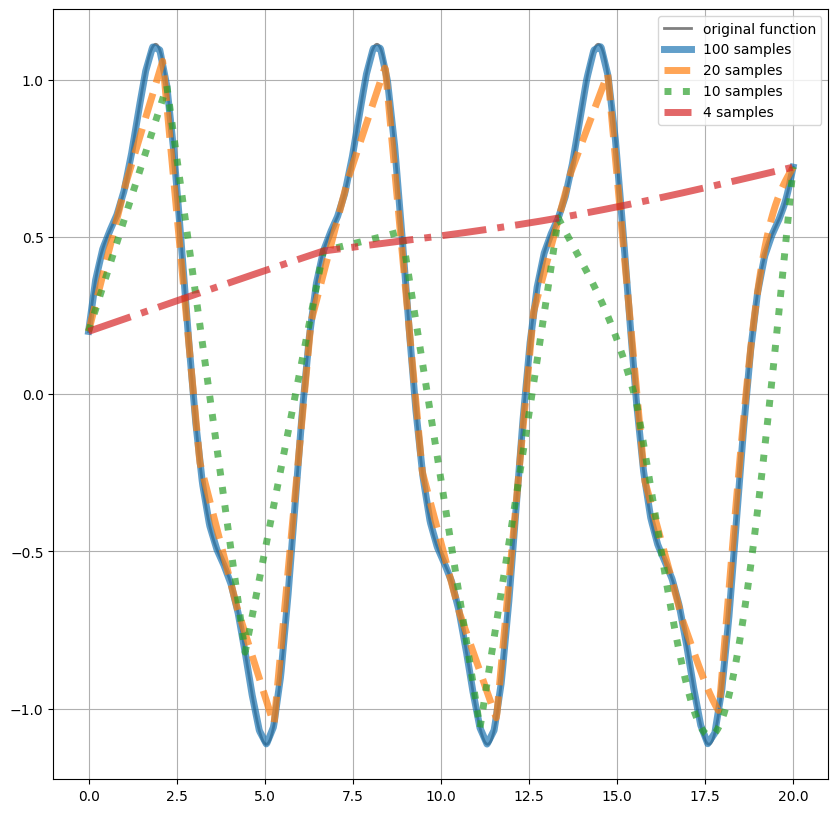

In [36]:
tlist = ["-", "--", ":", "-."]
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(gap_test, func_given(gap_test), color="black", alpha=0.5, linewidth=2)
for _ in range (4):
    plt.plot(gap_test, result_array[_], linestyle=tlist[_], alpha=0.7, linewidth=5)
plt.legend(["original function", "100 samples", "20 samples", "10 samples", "4 samples"])
plt.show()

In [13]:
print(20 / (2 * np.pi / 3))

9.549296585513721


In [16]:
# calculate RMSE

def rmse(result_arr, n = 1000):
    rmse_arr = np.zeros(4)
    xdat = np.linspace(0, 20, n)
    ydat = func_given(xdat)
    
    for _ in range(4):
        rmse_arr[_] = np.sqrt(np.mean((result_arr[_] - ydat)**2))
        
    return rmse_arr
    

In [32]:
# RMSE for each samples(100 => 4)
rmse_arr = rmse(result_array)
ind_n = [100, 20, 10, 4]
for _ in range(4):
    print("%3d samples : %.9f" %(ind_n[_] ,rmse_arr[_]))

100 samples : 0.005306501
 20 samples : 0.077822139
 10 samples : 0.333939457
  4 samples : 0.878537333
